In [3]:
!pip install soundFile

In [0]:
import librosa
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import soundfile

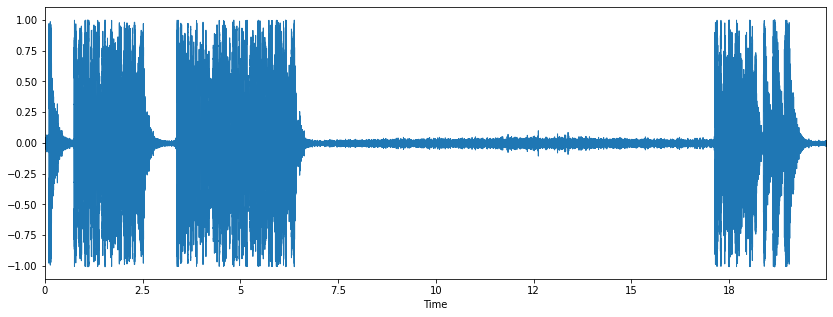

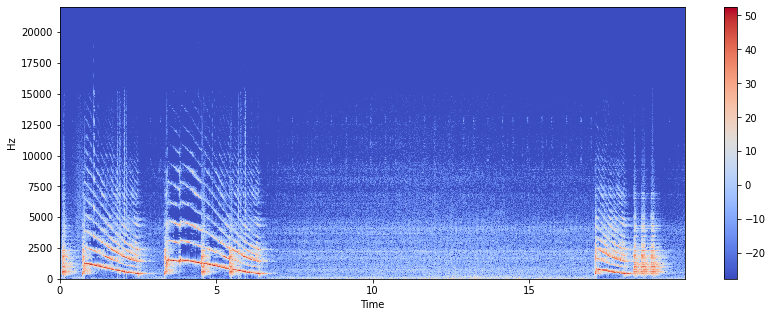

In [6]:
audiot = 'Police_0.webm'
data, sampling_rate = librosa.load(audiot,sr=44100)
plt.figure(figsize=(14, 5))
#librosa.audio.audioread()
librosa.display.waveplot(data,sampling_rate)


X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

6


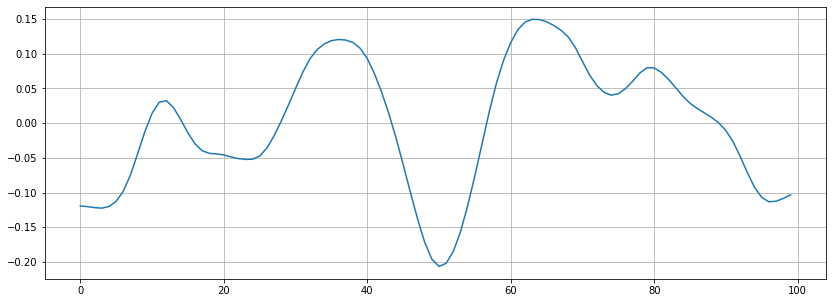

In [7]:
# zero crossing 
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(data[n0:n1])
plt.grid()
zero_crossings = librosa.zero_crossings(data[n0:n1], pad=False)
print(sum(zero_crossings))

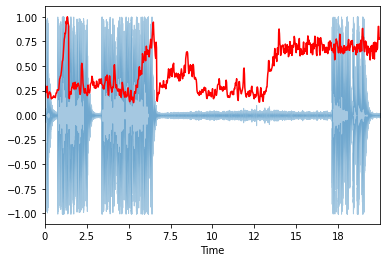

In [8]:
#spectral centroiddata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0EAAAEvCAYAAACDnMraAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzdd3xUVeL+8c+Z9E4KCSVAAgm9E5qColLEhgrYe1917bvq2tva167YsIu9oKIIakCq1AChhkAgBAIJIaS3Ob8/yPpj/YICCdyZzPN+veaVmTtnyAOcJPPk3nuusdYiIiIiIiLiK1xOBxARERERETmSVIJERERERMSnqASJiIiIiIhPUQkSERERERGfohIkIiIiIiI+RSVIRERERER8ir/TAQ5FXFycTUpKcjoGAGVlZYSFhTkdQ7yU5o8cKs0daQjNHzlUmjvSEEd6/ixatKjAWtt8X895ZQlKSkpi4cKFTscAID09nWHDhjkdQ7yU5o8cKs0daQjNHzlUmjvSEEd6/hhjcvb3nA6HExERERERn6ISJCIiIiIiPkUlSEREREREfIpKkIiIiIiI+BSVIBERERER8SkqQSIiIiIi4lNUgkRERERExKeoBImIiIiIiE9RCRIREREREZ/i73QAEREREZG9VdbUkbW9lKztpdS6LaGBfoQE+hEaUP8x0I+QQH+ahwcR6K/f6cvBUwkSEREREUdYa8naXsrKrbtZm1/C2vxS1uWXkLOzHGv/+vWB/i56JzajX1I0/ZOi6ds2mmahgYc/uHg9lSAREREROWKstazaWsJ3y/P4btlWNhaWA+DnMiTHhdG1VSRjeremY0IEqQnhBPv7UV5TS3l1HRX1t/KaOsqrasnaXsrCnCJen5nNK+l7WlNqfDhpSTEMSI5mSEpzmkcEOfnXFQ+lEiQiIiIih5W1lrX5pXy3LI9vl28le0cZfi7DUR1iueqYDvRrF01yXNghH9pWUV1HRu4uFuUUsWDjTr5dlsek3zYB0KVlJMekxjE0tTlpSdEEB/g15l9NvJRKkIiIiIgcFtZaJmfk8eLPWazbXorLwKD2sVw+JJkTu7UgNrxx9tKEBPoxqH0sg9rHAuB2W1Zu3c3MdTuYuXYHE2dv4NWZ2QT5uxjYPpbhXeI5u38bgvxViHyVSpCIiIiINLrFm4p46NuVLNm0iy4tI3loTDdGdW9BfETwYf/cLpehe+soureO4tphKZRV1TJ/QyEz1xbw67od3Pt1Jm/P2chDY7pzdErcYc8jnkclSEREREQaTd6uCh7/YTVfL82jeUQQT47rydi+ibhcxrFMYUH+HN85geM7JwDwy5rt3Pd1Jue/MZ/TerXi7pO7EB95+MuZeA6VIBERERFpsLKqWl6dsZ7Xfs3GWrj+uBT+NqwDYUGe93bzuE7xDL45lpfT1zMhfT2/rN7OrSM7cuHgJPwcLGty5HjerBQRERERr/Jj5jbu+XoF+burOLVXK24/sROJ0aFOx/pTwQF+3DKiI2f0ac29X6/g/m9W8umiXB4+vTt92kY7HU8OM5UgERERETkklTV1PDplFe/MzaFbq0hePr8v/drFOB3roCTHhfHuZQOYsnwbD36byRkvz+G4Ts25fEh7jk6JxRjtGWqKVIJERERE5KBl7yjl+g+XsHLrbi4fksztJ3Y+5CWunWaM4eSeLTm2U3Pe/HUD783byAVvzqdziwguG5LMab1aaWntJsY7Z6qIiIiIOObLJbmc8sIs8oorePPiNO45pavXFqC9hQf5c+PwVGbdfjxPjOsJwD8/W8aQx3/m2elrKSitcjihNBbtCRIRERGRA1JZa7n1kww+X5zLgKQYnju3Ny2jQpyO1eiCA/w4K60N4/slMjurkDdnZfPs9HW8nL6e649L4dphHfD38/7S58sa5X/PGHOiMWaNMSbLGHPHPp4PMsZ8XP/8fGNMUv32EcaYRcaY5fUfj2+MPCIiIiLSuFZv2839cyv4YkkuNxyfwodXDmySBWhvxhiGpMbx1qUDmH7LsYzsmsB/pq1l3IS5bCgoczqeNECDS5Axxg94CRgNdAXONcZ0/cOwy4Eia20K8AzweP32AuBUa20P4GLgvYbmEREREZHG9duGnYx/ZS4VtfDB5QO5ZWQnn9sTkhIfzovn9eX5c/uQvaOUk577lQ/m52CtdTqaHILGmL0DgCxrbba1thr4CBjzhzFjgHfq738GnGCMMdbaJdbavPrtmUCwMSaoETKJiIiISCP4eXU+F745n+aRQdw7KJijUuKcjuSo03q1YurNx9CvXTR3fbmCy95ewPaSSqdjyUFqjBLUGti81+Pc+m37HGOtrQWKgdg/jBkLLLHW6owzEREREQ/w1ZItXPXuIlITwvn06sHEhvjW3p/9aRkVwruXDeD+U7syZ30ho56ZyQ8rtjkdSw6CaeguPGPMeGCUtfaK+scXAgOstX/fa0xm/Zjc+sfr68cU1j/uBkwGRlpr1+/n81wFXAWQkJDQ76OPPmpQ7sZSWlpKeHi40zHES2n+yKHS3JGG0PyRAzE9p4b3V1XTKdrFTf2CCfE3mjv7kFfq5tVlVeTsdjO4lR/ndg4iMlDXFtqXIz1/jjvuuEXW2rR9PdcYq8PlAm32epwI5O1nTK4xxh+IAnYCGGMSgS+Bi/ZXgACsta8BrwGkpaXZYcOGNUL0hktPT8dTsoj30fyRQ6W5Iw2h+SN/xlrL8z9l8f6qtQzvksCL5/X5/Ro5mjv7Nu5ENy/+ksUr6Vms3lXDXSd3ZWzf1rrQ6h940vxpjH2aC4BUY0yyMSYQOIc9e3X2Npk9Cx8AjAN+ttZaY0wz4DvgTmvt7EbIIiIiIiKHyO22PPDNSp6ZvpaxfROZcEFfXST0AAT6u7hlREem3DCUDs3Due3TDM5/Yz4btYKcx2pwCao/x+d6YCqwCvjEWptpjHnQGHNa/bA3gVhjTBZwC/DfZbSvB1KAe4wxS+tv8Q3NJCIiIiIHx1rLHV8s4+05G7ns6GSeHNfT51aAa6jUhAg+uXowj5zRneVbihn17Exe+iWLmjq309HkDxrlYqnW2inAlD9su3ev+5XA+H287mHg4cbIICIiIiKH7uX09XyyMJfrj0vh1pEddSjXIXK5DOcPbMeILgk88M1Knpy6hslL83h8XE96t2nmdDypp3ovIiIi4uN+WLGNJ6euYUzvVipAjSQ+MpiXzu/LGxelUVJZw7hX5vDGr9m6rpCHUAkSERER8WGZecXc/PFSerVpxuNje6oANbLhXRP4/qZjOKFLPA9/t4qr31tEcUWN07F8nkqQiIiIiI/aXlLJle8spFloAK9f2E+LIBwmUSEBTLigH/ec0pWfV2/nlBd+ZXlusdOxfJpKkIiIiIgPqqyp4+r3FrGzvJrXL0ojPjLY6UhNmjGGy4ck88k1g6mrs4x9ZQ7vzcvR4XEOUQkSERER8THWWu74fBlLNu3imbN60711lNORfEbfttF8d8NQjk6J5Z6vVnDDR0sprap1OpbPUQkSERER8TEvp6/nq6V53DqiI6N7tHQ6js+JDgvkzYv7849RnfhuWR6nvTiLtfklTsfyKSpBIiIiIj5kauaeleBO69WK649PcTqOz3K5DNcdl8KHVw5id0Utp780m28y8pyO5TNUgkRERER8xIot9SvBJUbxxDitBOcJBrWP5bsbhtC1ZSR/n7SEB79ZqYurHgEqQSIiIiI+IG9XBZe9vYDo0EBevyhNK8F5kITIYCZdNYhLj05i4uwNnPf6PLbvrnQ6VpOmEiQiIiLSxJVU1nDZ2wuoqK5j4iX9tRKcBwrwc3Hfqd147pzerNiym5NfmMVvG3Y6HavJUgkSERERacJq6txc+8FisraX8vIFfenUIsLpSPInxvRuzVfXHU1EkD/nvj6PN37Nxu3WMtqNTSVIREREpImy1nLv1yv4dV0Bj5zRnaGpzZ2OJAegU4sIvr7+aIZ3iefh71Zx7uvz2FhQ5nSsJkUlSERERKSJmjAjm0m/bebaYR04u39bp+PIQYgIDmDCBf14fGwPVm7dzYnPzeT1mdnUaa9Qo1AJEhEREWmCvl2Wx+M/rOaUni25bWQnp+PIITDGcHb/tky7+ViGpMTxyJRVjH1ljq4p1AhUgkRERESamEU5O7nlkwzS2kXz1PheuFxaCtubtYgK5vWL0njunN7kFJZxyvOzeOGndVpKuwFUgkRERESakC27Krjy3UW0igrmNS2F3WQYYxjTuzXTbjmWkd0SeHraWk57cTart+12OppXUgkSERERaSJq6tz8/cPFVNe6mXhJf2LCAp2OJI0sLjyIF8/ry2sX9mNHSRWnvTibt2ZvwFqdK3QwVIJEREREmoj/TFvL4k27+PeZPWjfPNzpOHIYjezWgh9uGsqQlDge+GYll769gB0lVU7H8hoqQSIiIiJNwIy1O3glfT3nDmjLab1aOR1HjoC48CDevDiNB8d0Y876QkY/N5Nf1mx3OpZXUAkSERER8XL5uyu55eOldEqI4L5TuzodR44gYwwXDU7im+uHEBsWxKVvLeD+yZlU1tQ5Hc2jqQSJiIiIeLE6t+XGj5ZQXl3HS+f30UIIPuq/F1i95Kgk3p6zkdNfms3KPC2asD8qQSIiIiJe7IWf1zEveycPnd6dlPgIp+OIg4ID/Lj/tG68dUl/CkqrOPXFWTz2/WoqqrVX6I9UgkRERES81Nz1hTz/0zrO7Nuacf0SnY4jHuK4zvFMv+VYxvZtzYQZ6xn57Axmrt3hdCyPohIkIiIi4oUKS6u48aMlJMWF8dCY7k7HEQ/TLDSQJ8b1YtKVgwhwubho4m/c/PFSCku1ghyoBImIiIh4HbfbcssnGeyqqOGl8/oSFuTvdCTxUIM7xDLlxqHccHwK3y7L44T/zODThZt9/rpCKkEiIiIiXub1X7OZsXYH957SlS4tI52OIx4uOMCPW0Z2YsoNQ0lpHs4/PlvG2a/OY3lusdPRHKMSJCIiIuJFlm7exZNT1zC6ewvOH9jW6TjiRVITIvjk6sH8+4weZO0o5bSXZnHbpxnk7650OtoRpxIkIiIi4iVKKmu4YdISEiKDeezMnhhjnI4kXsblMpw3sC3p/xjGVUPb8/XSLRz3VDov/rzOp64tpBIkIiIi4gWstdz15Qq27Krg+XN7ExUa4HQk8WKRwQHceVIXpt18LENT43jqx7Wc8PQMJmfk+cT5QipBIiIiIl7g00W5TM7I4+bhqfRrF+N0HGkikuLCePXCNCZdOYiokABumLSE01+ew0+r8pt0GVIJEhEREfFwWdtLue/rTAa3j+Vvw1KcjiNN0OAOsXzz9yE8MbYnhaVVXP7OQk56fhZTlm/F7W56ZUglSERERMSDVdbU8fdJSwgJ9OPZc3rj59J5QHJ4+LkMZ/Vvwy+3DePp8b2oqq3j2g8WM/LZmXy5JJfaOrfTERuNFpWXP1Vd6/59xZAAPxcBfgZ/PxeBfi78/Qz+LqOTMkVERA6jx75fzaqtu5l4SRoJkcFOxxEfEODnYmy/RE7v05rvV2zlxZ+zuPnjDJ6Zto4rhyYzukdL4sKDnI7ZICpBPs5ay47SKtZvL2NzUTm5O8vJLaogt6iCzUXlbNtdyV8dDhoc4CIkwI/QQH9CAv0IDfQjOGDPx6TYMAa1j2FgcizRYYFH5i8lIiLSRExbmc/bczZy2dHJHN85wek44mP8XIZTerbipO4t+Wn1dl74eR33fJ3JvZMzSWsXzahuLRjVrQVtYkKdjnrQVIJ8SGFpFWvyS1iXX8ra/37cXsKu8prfx7gMtIgMJjEmlMEdYmkTHUqrZsG4jKGmzlLrdlNTZ6mpc1Nb56a6zlJVU0d59Z5bRU3tno/VdRSWVjM/eydvz9kIQOcWEQzuEMug9rEMSo7VqjYiIiJ/YmtxBf/4LINurSK5fXQnp+OID3O5DCO6JjC8SzyrtpYwNXMbUzO38fB3q3j4u1V0aRnJqG4JjOrWgs4tIrziKCGVoCbI7bbk7CxnZd5uMvOKWbl1N5l5u9lRUvX7mIhgfzomRDC6ewtS4yNITQinXUwYLaKCCfRvvFPFqmvdLMvdxbzsQuZmF/Lh/E28NXsjxkCP1lGM7LrnCyYlPtwrvmBERESOBLfb8o9Pl1Fd6+aFc/sQ5O/ndCQRjDF0bRVJ11aR3DyiI5sKy38vRM/9tI5np6/juxuG0K1VlNNR/5JKkJez1rKxsJyMzbvIyN3Fii3FrNpaQmlVLQD+LkNKfDhDU+Po2jKSjgkRdEyIICEy6IiUjkB/F2lJMaQlxXD98alU1daRsbmYuesL+WXNdp76cS1P/biW9nFhjOzWglHdEuiV2AyXTvoUEREf9sH8HGZlFfDIGd1p3zzc6Tgi+9Q2NpQrj2nPlce0Z0dJFTPW7qBry0inYx0QlSAvYq1l2+5KMrfsJiN3F0s372JZbjHFFXsOZwsJ8KNrq0jO7Nuabq0i6doyitSEcIIDPOe3R0H+fgxIjmFAcgw3Dk9lW3El01ZuY2pmPm/8ms2EGetJiAxidPeWXHJUEklxYU5HFhEROaJyCsv495TVDE2N47wBbZ2OI3JAmkcEMa5fotMxDphKUAP8tCqfL9dWUxCRS3JcGO3jwhp88n+d21JUXs2mneVs2FHGhoI9t+yCMjYWlFFRUwfsOXenU4tITurRgl6JzejVphmp8eH4+3nXquctooK5cHASFw5Oori8hp9W5zM1cxsfzt/Eu3M3Mrp7S645tgM9Ej1/t6qIiEhD1bktt32agb+f4YlxPXWouMhhohLUAEs27WLKhhq+zc74fVtUSMDvhSgxOgQ/175LSZ217CqvprCsmsLSKnaWVVNYWk1ReTV7X4/Kz2VoEx1CctyeVdbax4XRqUUk3VtHEhrYtP77okIDOLNvImf2TWT77komzt7IB/Ny+G75Vo7qEMs1x3ZgaGqcfiCIiEiT9dbsDSzYWMTT43vRMirE6TgiTVajvIs2xpwIPAf4AW9Yax/7w/NBwLtAP6AQONtau9EYEwt8BvQH3rbWXt8YeY6U20Z1ondAHu179GdjYRnZe+25mZddSF5x5Z++PiokgNjwQGLDAmkfF05aUiBxYYHEhAXSJiaU5Lgw2sSEEuBle3caQ3xkMHeM7sx1x3Xgw/mbeHPWBi6a+BtdW0Zy9bHtOaVnK10sTkREmpSs7SU8MXUNw7skcGbf1k7HEWnSGlyCjDF+wEvACCAXWGCMmWytXbnXsMuBImttijHmHOBx4GygErgH6F5/8zr+LkP75uG0bx7O8Z3/9zm3+88vsKOT//9aRHAAVx/bgUuOTuLrJXlMmLmeGz9ayku/ZHHryE6M7JqgPUMiIuL1auvc3PpJBmGBfvz7zO762SZymDXGLoYBQJa1NttaWw18BIz5w5gxwDv19z8DTjDGGGttmbV2FnvKUJPjcpk/vcmBC/L346z+bZh+87G8eF4faussV7+3iDNensOcrAKn44mIiDTIhBnrycgt5uHTexAfEex0HJEmrzFKUGtg816Pc+u37XOMtbYWKAZiG+Fzi49x1V+5+Mebj+HxsT3I313JeW/M54I35pOxeZfT8URERA5aZl4xz/20jlN6tuTkni2djiPiExrjnKB97dL443FgBzLmzz+JMVcBVwEkJCSQnp5+MC8/bEpLSz0mi69JAB4Y4OKXzYF8u76AMS8V0C/Bj3M7BxIX4h3nUWn+yKHS3JGG0PzxHLVuywNzKwnxgxPjij3+/0VzRxrCk+ZPY5SgXKDNXo8Tgbz9jMk1xvgDUcDOg/kk1trXgNcA0tLS7LBhww41b6NKT0/HU7L4qpHAvyprmDhrI6/NXM+D82t4YlxPTuzu+b9N0/yRQ6W5Iw2h+eM5npq6hs0lWbxxURrDuyY4Hecvae5IQ3jS/GmMX5cvAFKNMcnGmEDgHGDyH8ZMBi6uvz8O+Nlae1B7gkT+TERwADcOT2XKjUNJigvjmvcXc+/XK6isv66SiIiIp1mWu4tXZqxnbN9EryhAIk1Jg0tQ/Tk+1wNTgVXAJ9baTGPMg8aY0+qHvQnEGmOygFuAO/77emPMRuA/wCXGmFxjTNeGZhLf1S42jM+uOYorhiTz7twcznh5Dut3lDodS0RE5H9U1dZx26cZNA8P4t5T9dZH5EhrlOsEWWunAFP+sO3eve5XAuP389qkxsgg8l+B/i7uPqUrR6XEcusnGZz6wiweGtOdsf0SnY4mIiICwHPT17E2v5S3Lu1PVEiA03FEfI53nD0ucgiO75zA9zceQ4/WUdz6aQa3fLyUsqpap2OJiIiPW7p5FxNmrGd8v0SO6xTvdBwRn6QSJE1ai6hgPrxyEDeekMpXS7dw6guzyMwrdjqWiIj4qMqaPYfBJUQGc/cpOgxOxCkqQdLk+bkMN4/oyAdXDKKsupYzXp7Du3M3orU5RETkSHt2+jqytpfy2NieOgxOxEEqQeIzBneIZcoNQzm6Qyz3fp3JNe8vori8xulYIiLiI5ZsKuK1mes5O60Nx3Zs7nQcEZ+mEiQ+JTY8iDcv7s/dJ3fh59XbOen5X1mUU+R0LBERaeL2PgzurlO6OB1HxOepBInPcbkMVwxtz2fXHIXLBWe9OpeX07Nwu3V4nIiIHB7PTFvL+h1lPD62J5HBOgxOxGkqQeKzerVpxnc3DOXE7i144oc1XPnuQiqqdXFVERFpXIs3FfH6r9mcO6ANx+gwOBGPoBIkPi0yOIAXz+3DA6d14+c127lo4nyKK3SekIiINI7y6lpu+ySDllEh/OskHQYn4ilUgsTnGWO4+KgkXji3D0s37+Lc1+axo6TK6VgiItIE3Pd1JhsKy3hyfE8idBiciMdQCRKpd0rPVrxxcX82FJQxfsIcNu8sdzqSiIh4sa+XbuHTRblcNyyFozrEOR1HRPaiEiSyl2M7Nuf9Kways6ya8RPmsi6/xOlIIiLihXIKy7jryxX0axfNTcNTnY4jIn+gEiTyB/3aRfPJNYOps5bxr85l6eZdTkcSEREvUl3r5oZJS3AZeO6c3vj76e2WiKfRV6XIPnRuEcnn1xxFZHAA570+j1nrCpyOJCIiXuLpH9eQkVvM42N7khgd6nQcEdkHlSCR/WgbG8pn1wymTXQol72zgJlrdzgdSUREPNyMtTt4dWY25w1sy+geLZ2OIyL7oRIk8ifiI4P56KpBdGgezpXvLtQeIRER2a/tJZXc+slSOiaEc+8pXZ2OIyJ/QiVI5C9EhwXywRUDSY4L4/J3FjAnS0VIRET+l9ttufWTDEoqa3nxvL4EB/g5HUlE/oRKkMgBiKkvQkmxYVz2zgLmri90OpKIiHiQ137N5td1Bdx7alc6JkQ4HUdE/oJKkMgBig0P4oMrB+45R+jtBczPVhESERFYsaWYp6auYXT3Fpw3oK3TcUTkAKgEiRyEuPAgPrxyEK2jQ7j07QUs2LjT6UgiIuKgqto6bv0kg+iwQB49swfGGKcjicgBUAkSOUjNI4L48MqBtIgK5pKJv7EoR0VIRMRXPTt9HWvyS3h8bA+ahQY6HUdEDpBKkMghiI8IZtKVg4iPDObiiQtYvW2305FEROQIW7ypiFdnrOestESO75zgdBwROQgqQSKHKCEymA+vHEhYkB+Xv72Q7SWVTkcSEZEjpKK6jts+yaBlVAj3aDlsEa+jEiTSAC2jQnjz4v7sLKvmqncXUVlT53QkERE5Ap6cuobsgjKeGNeTiOAAp+OIyEFSCRJpoO6to3junN5k5O7i1k8zcLut05FEROQwmpddyMTZG7hocDuOTolzOo6IHAKVIJFGMLJbC+4c3Znvlm3lmelrnY4jIiKHSWlVLf/4LIN2saHcMbqz03FE5BD5Ox1ApKm4cmh71m8v44Wfs0iKDWNsv0SnI4mISCP795RV5BZV8MnVgwkN1NsoEW+lPUEijcQYw0Ond2dw+1ju+GIZv23Q0tkiIk3JjLU7+HD+Jq4c2p7+STFOxxGRBlAJEmlEgf4uJlzQjzbRoVz93kI2FpQ5HUlERBpBcXkNt3+2jJT4cG4Z0dHpOCLSQCpBIo0sKjSAiZf0xwKXvbOA4ooapyOJiEgDWGv55+cZFJRW8fT4XgQH+DkdSUQaSCVI5DBIigvj1Qv6samwnH9+loG1WjFORMRbvTcvh6mZ+dx+Ymd6tWnmdBwRaQQqQSKHycD2sdx+YmemZubz1uyNTscREZFDsGJLMQ9/u4rjO8dz+ZBkp+OISCNRCRI5jK4YmszwLgk8+v0qlm7e5XQcERE5CKVVtVz/4WJiwgJ5anwvXC7jdCQRaSQqQSKHkTGGp8f3Ij4imOs+WExxuc4PEhHxBtZa/vXFcjbtLOe5c3oTExbodCQRaUQqQSKHWVRoAC+d35ftJZXcpvODRES8wicLNzM5I4+bh3dkYPtYp+OISCNTCRI5Anq3acado7swbWU+b87a4HQcERH5E2vzS7hvciZHp8Ry7XEpTscRkcNAJUjkCLn06CRGdUvgse9Xs3hTkdNxRERkHyqq67jug8WEB/nzzNm98dN5QCJNkkqQyBFijOGJcb1o2SyY6z9YTFFZtdORRETkD+6fnEnWjlKePbsP8RHBTscRkcNEJUjkCIoKCeCl8/pSUFrNrZ9m4Nb5QSIiHuPLJbl8vHAz1w1LYUhqnNNxROQwUgkSOcJ6JjbjrpO78PPq7Xy/QavFiYh4glVbd3PnF8sZkBzDTcNTnY4jIoeZSpCIAy4a3I6Te7Tk83U1zMsudDqOiIhPK66o4W/vLyIyOIAXz+uDv5/eHok0dfoqF3GAMYbHxvYgPsTw90lL2F5S6XQkERGf5HZbbvs0g9yiCl4+v6/OAxLxEY1SgowxJxpj1hhjsowxd+zj+SBjzMf1z883xiTt9dyd9dvXGGNGNUYeEW8QERzAdX2CKams4YZJS6itczsdSUTE50yYuZ5pK/P510ldSEuKcTqOiBwhDS5Bxhg/4CVgNNAVONcY0/UPwy4Hiqy1KcAzwOP1r+0KnAN0A04EXq7/80R8QpsIF4+c3oN52Tv5z7S1TscREfEps7MKeGrqGk7p2ZJLj05yOo6IHEGNsSdoAJBlrc221lYDHwFj/jBmDPBO/XI7FH4AACAASURBVP3PgBOMMaZ++0fW2ipr7QYgq/7PE/EZY/slcu6ANrycvp6fVuU7HUdExCfk7arg75OW0KF5OI+P7cmetyUi4isaowS1Bjbv9Ti3fts+x1hra4FiIPYAXyvS5N13aje6tYrk5o+XsnlnudNxRESatKraOq79YDHVtW5euaAfYUH+TkcSkSOsMb7q9/Wrkz9e/GR/Yw7ktXv+AGOuAq4CSEhIID09/SAiHj6lpaUek0W8z97z5+IUN/fNqeXCCTO4a1AwAbpKufwJfe+RhvD1+fPuyiqWbq7lut5B5K5cSO5KpxN5D1+fO9IwnjR/GqME5QJt9nqcCOTtZ0yuMcYfiAJ2HuBrAbDWvga8BpCWlmaHDRvWCNEbLj09HU/JIt7nj/OnWbttXPXeImbsjuPh03s4F0w8nr73SEP48vz5bFEuP2/K4Kpj2vOPk7o4Hcfr+PLckYbzpPnTGIfDLQBSjTHJxphA9ix0MPkPYyYDF9ffHwf8bK219dvPqV89LhlIBX5rhEwiXmlktxZcfUx73p+3ia+XbnE6johIkzInq4A7v1jGUR1i+eeoTk7HEREHNbgE1Z/jcz0wFVgFfGKtzTTGPGiMOa1+2JtArDEmC7gFuKP+tZnAJ8BK4AfgOmttXUMziXiz20Z1ok/bZtw/OZOismqn44iINAmrt+3m6vcWkRwXxisX9NMFUUV8XKN8B7DWTrHWdrTWdrDWPlK/7V5r7eT6+5XW2vHW2hRr7QBrbfZer32k/nWdrLXfN0YeEW8W4Ofi0TN7sLuylse+X+10HBERr7e1uIJL31pAaJAfb186gKiQAKcjiYjD9GsQEQ/UuUUkVwxJ5uOFm1m4cafTcUREvNbuyhoufWsBJZW1vHXJAFo1C3E6koh4AJUgEQ914/BUWjcL4a4vV1BT53Y6joiI16mudfO39xeRtb2UVy7oS9dWkU5HEhEPoRIk4qFCA/2579SurMkvYeKsDU7HERHxKtZa7vhiGbOzCnn0zB4MTW3udCQR8SAqQSIebGS3FgzvksCz09eRW6SLqIqIHKj/TFvLF4u3cPPwjoxPa/PXLxARn6ISJOLh7j+t656Pk3U1PxGRAzHpt0288HMWZ6e14YYTUpyOIyIeSCVIxMMlRody0/BUpq/K58fMbU7HERHxaN8uy+OuL5dzbMfmPHxGd4wxTkcSEQ+kEiTiBS4bkkynhAjun5xJWVWt03FERDzST6vyuemjpaS1i2HCBf0I0LWARGQ/9N1BxAsE+Ll45Izu5BVX8vxP65yOIyLicWZnFfC3DxbTtVUkb16SRkign9ORRMSDqQSJeIm0pBjOTmvDG7M2sHrbbqfjiIh4jEU5RVz57kKSY8N459IBRATrYqgi8udUgkS8yB2jOxMZ7M9dX67A7bZOxxERcdyKLcVc8tZvxEcE8d4VA4gOC3Q6koh4AZUgES8SHRbInSd1YVFOEV8s2eJ0HBERR2VtL+Giib8REeTP+1cMJD4i2OlIIuIlVIJEvMy4von0aduMR6esoriixuk4IiKO2FRYzvlvzMdlDB9cOYjE6FCnI4mIF1EJEvEyLpfhoTHdKSqv5j8/rnE6jojIEbdmWwnnvj6Pqlo3718xgOS4MKcjiYiXUQkS8ULdW0dxwaB2vDcvh8y8YqfjiIgcMb+s3s7YV+ZQU+fm/csH0rlFpNORRMQLqQSJeKlbR3QiOjSQe7/O1CIJItLkWWt5a/YGLn9nAe1iQ/n6+qPp3jrK6Vgi4qVUgkS8VFRoAHeM7syinCI+X5zrdBwRkcOmps7N3V+t4IFvVjK8SwKfXjOYllEhTscSES+mEiTixcb2TaRfu2ge+341xeVaJEFEmp7iihoufWsBH8zfxDXHdmDCBf0IDfR3OpaIeDmVIBEv5nIZHhzTjaLyap6epkUSRKRpySks48yXZzN/QyFPjuvJHaM743IZp2OJSBOgEiTi5bq1iuLCQe14f14OK7ZokQQRaRp+WLGVMS/NprCsmvcvH8j4tDZORxKRJkQlSKQJuGXknkUS7vl6hRZJEBGvtruyhls/yeCa9xfTNiaUr649moHtY52OJSJNjEqQSBMQFRLAnSd1YcmmXXymRRJExEvNyy5k9LO/8tXSLdxwQiqf/+0oknQNIBE5DFSCRJqIM/u0Jq1+kYTdlVokQUS8R1VtHY9OWcW5r88jwM/w6TWDuWVERwL89DZFRA4PfXcRaSJcLsN9p3ZjZ1k1E9LXOx1HROSArNq6mzEvzubVmdmcN6AtU24cSt+20U7HEpEmTmtMijQhPRKjOL13K96ctYELBrWjVTNdR0NEPFNNnZtXZ6zn+Z+yiAwJYOIlaRzfOcHpWCLiI7QnSKSJuW1UJyzw1I9aMltEPNOKLcWMeXE2T/24lhHdEph601AVIBE5olSCRJqYxOhQLj0qiS+XbCEzT0tmi4jnqKyp48mpqxnz0mx2lFbx6oX9eOm8vsSGBzkdTUR8jEqQSBN07XEpRIUE8OiU1VirJbNFxHmLcoo4+flfeemX9ZzRpzXTbz6WUd1aOB1LRHyUSpBIExQVEsANx6cyK6uAGWt3OB1HRHxYSWUND3yTybgJc6iscfPOZQN4anwvokIDnI4mIj5MCyOINFEXDGrHO3M38uiU1QxNbY6fyzgdSUR8yK7yat6avZG3Zm9gd2UtFw1uxz9P7Ex4kN56iIjz9J1IpIkK9Hfxz1Gdue7DxXy2aDNn92/rdCQR8QEFpVW88esG3p+XQ2lVLSO6JvD341PomdjM6WgiIr9TCRJpwk7q0YI+bZvx9I9rObVXK0ID9SUvIofHtuJKXp25nkm/baKq1s0pPVtx3XEd6Nwi0uloIiL/h94RiTRhxhjuPrkLY1+Zyxu/buCGE1KdjiQiTUxhaRUv/JzFh/M3UWctp/duzbXHdaBD83Cno4mI7JdKkEgT169dDCd2a8GEGes5Z0Ab4iOCnY4kIk1ARXUdE2dv4JX09VTU1DG+XyLXHZdCm5hQp6OJiPwllSARH3D76M5MX5XPs9PX8e8zejgdR0S8WJ3b8vmiXJ6etob83VWM6JrA7Sd2IiU+wuloIiIHTCVIxAckx4VxwaB2vDt3I5cdnaQ3K+L1qmvdlFbVUlFTR0V1LeXVdVRU11Fes+cjgL/LEODnIsDPhb/ff+8bokMDad0sBJdWTDwo1lrS1+zgse9Xsya/hN5tmvHCuX0ZkBzjdDQRkYOmEiTiI/5+fAqfLcrlyalrePXCNKfjiByUgtIqFm4sYuHGnSzMKSIzr5iaukO/EHBooB8p8eGkxkfQqUU4qQkRdEyIoFVUMMaoHO1ta3EFU5ZvY3JGHhmbd9EuNpSXz+/L6O4t9G8lIl5LJUjER8SGB3H1Me15etpaFuUU0a9dtNORRPZrZ1k101fm89vGnSzKKWJDQRmwZ+n3XolRXDYkmRaRwYQG+hES6E9ogB8hgfW3AD9cxlBT56amzk2t29bft9TUutlRWsXa/BLW5Zfy67odfL449/fPGxnsT9920fRPiqFfu2h6JTYjJNDPqX8Gx+TvruT75Vv5bvlWFmwsAqBry0geHNONc/q3JdBf11oXEe+mEiTiQy4fmsw7c3N4/PvVfHz1IP0WVzxKZU0d01fl89WSLaSv2UGt2xITFki/dtGc078NaUkxdG8dSZB/45aSXeXVrM0vZW1+CZl5xSzcWET6mjXAnkPqureOIq1dNGlJMQxMjiE6LLBRP7+nKC6vYfKyPL7JyGPBxp1YC51bRHDriI6c1LOlVnsTkSZFJUjEh4QG+nPT8FTu/moFP6/ezgldEpyOJD6uzm2Zl13Il0u28MOKbZRW1ZIQGcTlQ5I5rXcruraMPOxlvVloIAOSY/7n3JZd5dUsyiliYU4RizYW8e68HN6YtQHYUwwGd4hlcPtYBibHEhUacFjzHU51bsvsrAI+WbiZH1fmU13rJiU+nBtPSOXkHi1JTdD5gyLSNKkEifiYs/u34c1ZG3j8h9UM6xSPn04OFwfUuS2TftvECz+vI393FeFB/ozu3oIz+rRmYPtYx+dls9BATuiS8PsvCqpq61ieW8y87ELmZhfy4fxNvDV7I8bsOUxscPtY0pJiSEuKJi48yNHsByK/zM1TU9fw+eJcthZX0iw0gHP7t2F8Whu6tTr8xVNExGkNKkHGmBjgYyAJ2AicZa0t2se4i4G76x8+bK19p377I8BFQLS1VvvZRY6AAD8X/xjViWs/WMzni3M5K62N05HExyzPLebur5aTkVvMgOQY7j2lGyd0iSc4wHPPvQny96svOTFcf3wqVbV1LN20i3nZO5mbXfA/e4qS48LqD5+Lpl+7GDo0D3O0VFhr2ba7kozNu1i6uZgFG3eyKKcCl8nimI7NufvkrgzvGt/ohxmKiHiyhu4JugP4yVr7mDHmjvrHt+89oL4o3QekARZYZIyZXF+WvgFeBNY1MIeIHITR3VvQq00znpm2ltN6tfLoN5/SdBRX1PCfH9fw3rwcYsKCeO6c3pzWq5VX7nUI8vdjYPtYBraP5UZSqaypY8WWYhbmFLFwYxHTV+Xz6aI9Cy7EhAXSKSGC5OZhJMeGkRwXRnLzMNpEhzb6AgNutyW/pJKs7aUsyy1m6eZdZGzexfaSKgAC/AxdW0YyrmMAt409hhZRuniyiPimhpagMcCw+vvvAOn8oQQBo4Bp1tqdAMaYacCJwCRr7bz6bQ2MISIHwxjDHSd25tzX5/HOnI1cfWwHpyNJE2at5euleTz83Sp2llVx0eAkbhnZkchg7z2X5o+CA/7/niKO3fN3Xr+jjEU5e1a3y9peyvfLt1JUXvP7a/xchsToEFpFhRATHkhcWCCx4UHEhAUSF77nfligP/v7EVleXcuGgnI2FJSyoaCMDQXlbCwoo6Km7vcx7ZuHMSQljl5tmtGrTTO6tIwgyN+P9PR0FSAR8WkNLUEJ1tqtANbarcaY+H2MaQ1s3utxbv02EXHQ4A6xDOvUnJd+yeKc/m29+uRu8VwbCsr41xfLmZtdSK/EKN66pD89EqOcjnXYGWNIiQ8nJT6cs/u3/X37rvLq+sKy55ZdUEZ+cSWr8nZTUFrF7srag/5cfi5D25hQkuPCOKpDLMlxYbSPC6Nb6yiiQvR1LSKyL8baP7/YnDFmOtBiH0/dBbxjrW2219gia+3/XHzEGPMPIMha+3D943uAcmvt03uNKf2rc4KMMVcBVwEkJCT0++ijj/4095FSWlpKeLhOZ5JD4/T82Vzi5t7ZFYxODuCsTk1z2d+myum5cyAW5dfy+rIqXAbGdQxkWBt/XNrz/6dq3ZaSasvuaktJNVTW7v9ndIAfJIS6iAsx+B/kQhLeMH/EM2nuSEMc6flz3HHHLbLW7vMK8X+5J8haO3x/zxlj8o0xLev3ArUEtu9jWC7//5A5gET2HDZ3UKy1rwGvAaSlpdlhw4b9+QuOkPT0dDwli3gfT5g/SyqW8u2yrdx99kBaNQtxNIscOE+YO/tTW+fmqR/XMmHJenomRvHy+X1JjA51OpbsxZPnj3g2zR1pCE+aPw09I3MycHH9/YuBr/cxZiow0hgTbYyJBkbWbxMRD3DLiI5g4dnpa52OIk1AQWkVF038jQkz1nPewLZ8es1gFSAREfE4DS1BjwEjjDHrgBH1jzHGpBlj3gCoXxDhIWBB/e3BvRZJeMIYkwuEGmNyjTH3NzCPiBykxOhQLhrcjs8W5bJmW4nTccSLLdlUxKkvzGJRThFPjuvJv8/ooWWXRUTEIzWoBFlrC621J1hrU+s/7qzfvtBae8Ve4yZaa1Pqb2/ttf2f1tpEa62r/uP9DckjIofmuuNSCA/y55Epq5yOIl7IWst783I469W5+PsZPv/bUYzX9adERMSDNe4FCkTEK0WHBXLDCanMXLuD9DX7OrVPZN/q3JY7v1jOPV+tYEhKHN9eP5TurZv+6m8iIuLdVIJEBICLBieRFBvKI9+torbO7XQc8QLVtW5umLSEjxZs5vrjUnjz4v5aal1ERLyCSpCIABDo7+LOk7qwbnspk37b5HQc8XCVNXVc9d5Cvlu+lbtP7sJtozrhOshlmkVERJyiEiQivxvZNYFB7WN4Zvo6iitq/voF4pNKq2q5eOJvzFi7g0fP7MEVQ9s7HUlEROSgqASJyO+MMdx9cleKyqt56Zcsp+OIB9pVXs35b8xnYU4Rz57dm3MHtHU6koiIyEFTCRKR/9G9dRTj+iby1uwN5BSWOR1HPMiOkirOeW0eq/J288r5fRnTu7XTkURERA6JSpCI/B+3jepEgJ+Lx75f7XQU8RBbdlVw1qtzySks581L0hjZrYXTkURERA6ZSpCI/B8JkcFcc2wHvl+xjfnZhU7HEYft2QM0l4KSKt67fABDU5s7HUlERKRBVIJEZJ+uHNqellHBPPzdKtxu63QccUhFdR1XvLOAHSVVvHfFQNKSYpyOJCIi0mAqQSKyTyGBftx+YmeWbynmiyVbnI4jDqhzW276eAnLthTz/Dl96N2mmdORREREGoVKkIjs12m9WtErMYonp66mvLrW6ThyhD06ZRVTM/O5++SuOgdIRESaFJUgEdkvl8twzyldyd9dxWszs52OI0fQe3M38sasDVw8uB2XHZ3kdBwREZFGpRIkIn8qLSmG0d1b8PrMbApKq5yOI0fAL6u3c9/kTE7oHM+9p3bDGON0JBERkUalEiQif+m2UZ2orHXz4s+6gGpTl5lXzPUfLqZLy0ieP7cPfi4VIBERaXpUgkTkL3VoHs7Z/dvwwfwcXUC1CdtaXMFlby8gKiSAiZf0JyzI3+lIIiIih4VKkIgckJtOSMXf5eKpH9c6HUUOg/LqWi57eyFlVXVMvLQ/CZHBTkcSERE5bFSCROSAxEcGc/mQZL7JyGN5brHTcaQRWWu568sVrN62mxfP60PnFpFORxIRETmsVIJE5IBddWx7okMDePyH1U5HkUY06bfNfLlkCzcP78iwTvFOxxERETnsVIJE5IBFBgdw/fGpzMoq4Nd1O5yOI41geW4x90/O5JiOzbn+uBSn44iIiBwRKkEiclAuGNSW1s1CeOz71bjd1uk40gDF5TVc++Ei4sIDefbs3ri0EpyIiPgIlSAROShB/n7cNqojmXm7+WZZntNx5BC53ZZbP13KtuJKXjy/LzFhgU5HEhEROWJUgkTkoI3p1ZouLSN56sc1VNe6nY4jh+C1X7OZvmo7/zqpC33bRjsdR0RE5IhSCRKRg+ZyGe4Y3ZnNOyv4cH6O03HkIM3LLuTJqWs4uUdLLjkqyek4IiIiR5xKkIgckmNS4ziqQyzP/5xFSWWN03HkAG0vqeTvk5bQLiaUx8b2wBidByQiIr5HJUhEDokxhttP7MzOsmpem5ntdBw5ALV1bm6YtISSyhpevqAvEcEBTkcSERFxhEqQiByyXm2acVqvVrw6M5ucwjKn48hfeDl9PfOyd/Lw6T10QVQREfFpKkEi0iB3ndyFAJfh/smZWKslsz1VxuZdPPfTOk7r1Ypx/RKdjiMiIuIolSARaZCEyGBuGt6RX9bsYPqq7U7HkX2oqK7j5o+XEh8RxENjujsdR0RExHEqQSLSYJccnURqfDgPfJNJZU2d03HkD/49ZRXZBWU8Pb4XUaE6D0hEREQlSEQaLMDPxYNjupNbVMHL6eudjiN7+WXNdt6bl8MVQ5I5KiXO6TgiIiIeQSVIRBrF4A6xjOndigkz1rOxQIskeIKdZdX887NldEqI4LZRnZyOIyIi4jFUgkSk0fzrpPpFEr7RIglOs9Zy5xfLKC6v4ZmzexMc4Od0JBEREY+hEiQijSYhMpibR3Qkfc0Opq3MdzqOT/tsUS5TM/O5dWRHurbSctgiIiJ7UwkSkUZ18VFJdEwI54FvVlJRrUUSnLB5ZzkPfLOSgckxXDG0vdNxREREPI5KkIg0qv8ukrBlVwWvpGc5Hcfn1LktN3+8FAM8fVYv/FzG6UgiIiIeRyVIRBrdoPb/XSQhW4skHGETZqxnYU4RD4zpRmJ0qNNxREREPJJKkIgcFv86qQuB/i7unaxFEo6UZbm7eGbaWk7u2ZIz+rR2Oo6IiIjHUgkSkcMiITKYW0Z0ZObaHXyzbKvTcZq88upabvpoKc0jgvj36T0wRofBiYiI7I9KkIgcNhcflUTPxCge/CaTXeXVTsdp0h76dhUbCst4+qxeRIUGOB1HRETEo6kEichh4+cyPHpmD4rKa3h0ymqn4zRZP2ZuY9Jvm7jqmPYc1SHO6TgiIiIeTyVIRA6rbq2iuGJoMh8v3Mzc9YVOx2lytu+u5PbPl9GtVSS3jujkdBwRERGv0KASZIyJMcZMM8asq/8YvZ9xF9ePWWeMubh+W6gx5jtjzGpjTKYx5rGGZBERz3XTCR1pExPCXV8up7JG1w5qLG635bbPllFRU8dz5/Qm0F+/1xIRETkQDf2JeQfwk7U2Ffip/vH/MMbEAPcBA4EBwH17laWnrLWdgT7A0caY0Q3MIyIeKCTQj0dO70F2QRkv/6JrBzWWd+ZuZObaHdx1cldS4iOcjiMiIuI1GlqCxgDv1N9/Bzh9H2NGAdOstTuttUXANOBEa225tfYXAGttNbAYSGxgHhHxUMd0bM4ZfVrzyoz1rM0vcTqO19tc4ubR71dzQud4LhjY1uk4IiIiXqWhJSjBWrsVoP5j/D7GtAY27/U4t37b74wxzYBT2bM3SUSaqLtP7kJYkD93frEct1vXDjpUlTV1vJpRSWSwP4+P66nlsEVERA6S/18NMMZMB1rs46m7DvBz7Oun8+/vfowx/sAk4Hlrbfaf5LgKuAogISGB9PT0A/z0h1dpaanHZBHv44vzZ1wHwxvLi7j//ekc31ZLOR+KD1ZVkVtqubmfYcXCuU7HES/ki997pHFo7khDeNL8+csSZK0dvr/njDH5xpiW1tqtxpiWwPZ9DMsFhu31OBFI3+vxa8A6a+2zf5HjtfqxpKWl2WHDhv3Z8CMmPT0dT8ki3scX58+x1rLqzfl8ub6Y604fREJksNORvMoPK7YyLWcxI9r5c+P4/X57FvlTvvi9RxqH5o40hCfNn4YeDjcZuLj+/sXA1/sYMxUYaYyJrl8QYWT9NowxDwNRwE0NzCEiXsIYwyOn96C6zs19X2dirQ6LO1CbCsv5x2fL6JUYxdmdAp2OIyIi4rUaWoIeA0YYY9YBI+ofY4xJM8a8AWCt3Qk8BCyovz1ord1pjElkzyF1XYHFxpilxpgrGphHRLxAUlwYNw3vyA+Z2/hyyRan43iFqto6rvtwMQZ48by++Lt0HpCIiMih+svD4f6MtbYQOGEf2xcCV+z1eCIw8Q9jctn3+UIi4gOuOqY9v6zZzj1fraBfu2jaxYY5HcmjPfLdKpZvKea1C/vRJiaU9U4HEhER8WK6sp6IOMLPZXj27N74uQw3fLSUmjq305E81rfL8nh3bg5XDElmZLd9rVMjIiIiB0MlSEQc06pZCI+N7UnG5l08M22t03E80oaCMu74fDl92jbj9tGdnY4jIiLSJKgEiYijTurRknP6t+GVGeuZs77A6TgepbKmjus+WIy/n+HF8/oS4Kdv2SIiIo1BP1FFxHH3ntqV5Ngwbvk4g6KyaqfjeIwHv13Jyq27+c9ZvWjdLMTpOCIiIk2GSpCIOC400J/nz+1DYVkVd3yxTMtmA18v3cKH8zdx9bHtOb5zgtNxREREmhSVIBHxCN1bR3H7iZ2ZmpnPpN82Ox3HUZl5xdzx+XLS2kVz28hOTscRERFpclSCRMRjXHZ0MkNT43jw20yytpc4HccRBaVVXPXuIpqFBvDyBToPSERE5HDQT1cR8Rgul+Hps3oRFujP3yctpaK6zulIR1R1rZtr319MQWkVr12YRnxEsNORREREmiSVIBHxKPERwTw1vhert+3m2g8W+cz1g6y13Dc5k9827uSJcT3pkRjldCQREZEmSyVIRDzOcZ3jeeT0HvyyZge3fpKB2930F0p4f14Ok37bxLXDOjCmd2un44iIiDRp/k4HEBHZl/MGtqW4oobHf1hNZIg/D43pjjHG6ViHxZz1BTzwzUpO6ByvhRBERESOAJUgEfFYfxvWgV0V1bw6I5tmIYHcNqrpFYTN/6+9uw+yqq7jOP7+7t0lHqRFBRSEQGgRFUMJCaRExQqykkpJK5/GBywasTKH+ictbaaptBrNKLCw1CKl3MqxMXHsQaR48IkWU1ERERZRF2EDd9lff9yjke2q7OKeu3vfrxlm95y9s/fLzHe+937uOb/fPt/I7BtXMrx/H7532pFUVHTPoCdJUikxBEkqaXOnjaahsYlr7n6M6l5VnH/siLxL2mu272zm/BuW05Jg/pnj6duzKu+SJEkqC4YgSSUtIrjyY0fw0o5mrry9jupeVcw8emjeZXVY064WLv7V/Txav42F50xgeP8+eZckSVLZMARJKnmFiuCqT45l644m5i5+kL49K5l+xKC8y2q3HU27+PxNK/lTXT1fP/lw3lvTP++SJEkqK+4OJ6lLeFtlgXlnvJsjh/Zjzi/v546HN+ZdUrts39nMuQv/wZ/q6vnGjDGcOWl43iVJklR2DEGSuozePSr56dkTOGzw2/nsjSuY/5e1pNR1ts9u+HcTZyxYxtLHt3DVzLGcMXFY3iVJklSWDEGSupTq3lXcfP5Eph1+IFf8oY6v1a6muQv8QdUt23Zy+o/v46FnGvjhp8fx8XFD8i5JkqSyZQiS1OX06lHg2k+N44JjR3DD0qeY9fMVbN/ZnHdZbdrYsIOZ85ay9rltzD/raKaN6brrmSRJ6g4MQZK6pIqK4KsfOpRvzBjD3Y/UM3PeUjZt3ZF3Wf9n3ZZGTp13L5u27mThOROYMmpA3iVJklT2DEGSurQzJg5jwdlH8+Rz25lx7d9Ys3Fr3iW96s//2swpP7qXRP3IhwAABypJREFUrf9u5sbz3sN7Ruyfd0mSJAlDkKRu4PhDBrLowkmkBKdct5TaBzbkumFCQ2MTl/z6Ac68/u/07VnJolmTGDu0X271SJKk/2UIktQtHD64mt/MPoaRA/pw0c2rOP0n9+VyVeiOhzdy4tX38JtVzzD7+JH84aL3cciBfTu9DkmS1DZDkKRuY1B1LxZ/bjJXzBjDmo0vcdIP/spltatpaGx6y5/7uW07mX3TSi78xQoG7PM2bps9mS9/cDQ9qwpv+XNLkqQ9U5l3AZK0NxUqgs9MHMZJRwziu3c+wg1Ln6T2gQ1c+sFDmDl+KBUVsVefr6UlUfvABi7/3Wq279zFJR8YxawpI6kq+BmTJEmlyhAkqVvat08PrphxBKdPeAeX1a5m7uKHuOnv65gztYbJ7+zf4Ss0619o5NYVz3DryvWse76RI4f249unvIuaA7z1TZKkUmcIktStHT64mkWzJnHb/Rv45u11nLtwOT2rKpg8sj/Hjx7ICaMHMrhfrzf1u3Y07eKPqzeyaPnT3Pv4FlKCY0buzxffP4qPjB1MYS9fZZIkSW8NQ5Ckbi8imHHUQUwbcyDLnnieJXWbWPJIPXetqQdg9IF9mXroQMYMrqa5JdHc0kLTrkTTrhaas6+Pb97O7x/cwEs7mhmyby/mTK3hE+OGMHS/3jn/7yRJ0p4yBEkqGz2rCkwZNYApowZwWUo8Vr+NJWvqWbKmnh/ds5ZdLW1vq92zqoLpYwZx6vghTDx4/72+tkiSJHUeQ5CkshQR1BzQl5oD+jJrykgaGptY/2IjPQoVVBYqqCoEVYUKKiuCqsoKelUV3OxAkqRuwhAkSUB17yqqe1fnXYYkSeoEfqwpSZIkqawYgiRJkiSVFUOQJEmSpLJiCJIkSZJUVgxBkiRJksqKIUiSJElSWTEESZIkSSorhiBJkiRJZcUQJEmSJKmsGIIkSZIklZVIKeVdwx6LiM3AU3nXkekPPJd3Eeqy7B+1l72jjrB/1F72jjqis/tnWEppQGs/6JIhqJRExPKU0vi861DXZP+ovewddYT9o/ayd9QRpdQ/3g4nSZIkqawYgiRJkiSVFUNQx/047wLUpdk/ai97Rx1h/6i97B11RMn0j2uCJEmSJJUVrwRJkiRJKiuGoA6IiGkR8UhEPBYRc/OuR6UrIoZGxN0RURcRqyNiTnZ+v4i4MyIezb7um3etKk0RUYiIVRHx++z44IhYlvXOryKiR941qjRFRL+IuCUi1mQzaJKzR29GRHwhe816OCJujoiezh61JSKuj4j6iHh4t3Otzpoo+kH2HvrBiBjX2fUagtopIgrAtcB04DDg9Ig4LN+qVMKagS+llA4FJgKzs36ZC9yVUqoB7sqOpdbMAep2O/4WcHXWOy8A5+ZSlbqC7wN3pJRGA2Mp9pGzR68rIg4CLgLGp5TGAAXgNJw9atvPgGmvOdfWrJkO1GT/LgCu66QaX2UIar8JwGMppbUppZeBXwIn51yTSlRK6dmU0srs+5covgk5iGLPLMwethCYkU+FKmURMQQ4CZifHQdwAnBL9hB7R62KiLcDxwILAFJKL6eUXsTZozenEugVEZVAb+BZnD1qQ0rpz8Dzrznd1qw5GbghFd0H9IuIQZ1TaZEhqP0OAp7e7Xh9dk56XRExHDgKWAYckFJ6FopBCRiYX2UqYd8DLgVasuP9gRdTSs3ZsfNHbRkBbAZ+mt1OOT8i+uDs0RtIKT0DfAdYRzH8NAArcPZoz7Q1a3J/H20Iar9o5Zxb7el1RcQ+wK3AxSmlrXnXo9IXER8G6lNKK3Y/3cpDnT9qTSUwDrgupXQUsB1vfdObkK3dOBk4GBgM9KF4C9NrOXvUHrm/jhmC2m89MHS34yHAhpxqURcQEVUUA9CNKaXF2elNr1z+zb7W51WfStZk4KMR8STF225PoHhlqF92iwo4f9S29cD6lNKy7PgWiqHI2aM3ciLwREppc0qpCVgMHIOzR3umrVmT+/toQ1D7/QOoyXZJ6UFxsWBtzjWpRGVrOBYAdSmlq3b7US1wVvb9WcBtnV2bSltK6SsppSEppeEU58ySlNKngbuBU7KH2TtqVUppI/B0RBySnZoK/BNnj97YOmBiRPTOXsNe6R1nj/ZEW7OmFjgz2yVuItDwym1zncU/ltoBEfEhip/IFoDrU0pX5lySSlREvBf4C/AQ/13X8VWK64IWAe+g+IJzakrptYsKJQAi4jjgkpTShyNiBMUrQ/sBq4DPpJR25lmfSlNEHElxU40ewFrgHIofgjp79Loi4nLgkxR3OF0FnEdx3YazR/8nIm4GjgP6A5uArwG/pZVZkwXrayjuJtcInJNSWt6p9RqCJEmSJJUTb4eTJEmSVFYMQZIkSZLKiiFIkiRJUlkxBEmSJEkqK4YgSZIkSWXFECRJkiSprBiCJEmSJJUVQ5AkSZKksvIf8u0byE74RO8AAAAASUVORK5CYII=
import sklearn
x=data
sr= sampling_rate
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

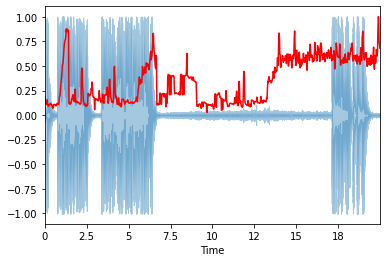

In [9]:
#spectral rollof
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

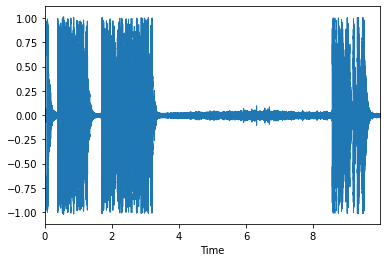

In [10]:
#mel-frequency cepstral coefficients
x, fs = librosa.load(audiot)
librosa.display.waveplot(x, sr=sr)

In [11]:
#scaling variance and unit distance
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

NameError: ignored

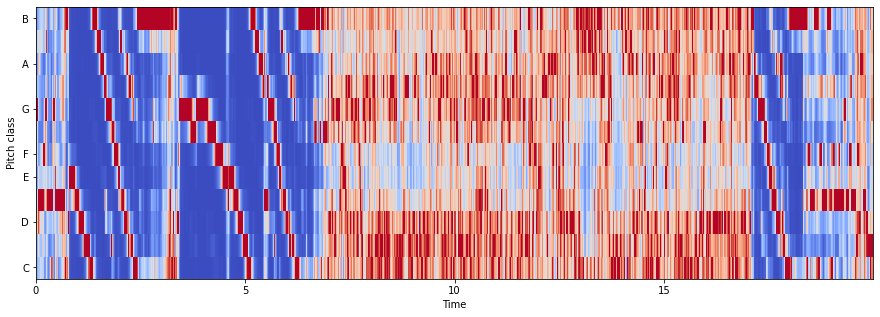

In [12]:
#chroma frequencies
# Loadign the file
x, sr = librosa.load(audiot)
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')